In [1]:
from ROOT import TEfficiency, TFile, TDirectory, TCanvas, gStyle, TGraphAsymmErrors, TLegend

Welcome to JupyROOT 6.26/00


In [2]:
f_out = TFile.Open("outputHLT_Data2018_newMenudRCut0p3.root")

In [39]:
def DrawTrigSeq(trigDir, obj, canv, _and = False, _col = 221, _leg = 0, _disc = "", _rxu = 50, _rxd = 0, _ryd = 0, _ryu = 1, _nx = 25, _ny = 30) :
    if not ( _and ) :
        canv.Clear();
    first = True;
    hist = trigDir.Get(obj)
    hist = hist.GetPassedHistogram()
    if( (hist.IsA()).GetName() == "TEfficiency") :
        canv_tmp.cd()
        hist.Draw()
        canv_tmp.Update()
        hist = hist.GetPaintedGraph()
    canv.cd()
    canv.Draw()
    col = _col
    if( _and ) : col = col-1
    hist.SetLineColor(col)
    hist.SetMarkerColor(col)
    hist.SetMarkerSize(marker_size)
    hist.SetMarkerStyle(marker_style)
    hist.SetStats(0)
    hist.GetYaxis().SetRangeUser(_ryd, _ryu)
    hist.GetYaxis().SetNdivisions( _ny)
    hist.GetXaxis().SetRangeUser(_rxd, _rxu)
    hist.GetXaxis().SetNdivisions( _nx)
    if( _leg != 0 ) :
        leg.AddEntry(hist, _disc)
    if( _and ) :
        hist.Draw( "same" )
    else : 
        hist.Draw( "" )

    canv.Draw()
    if ( _leg == 0) :
        return canv, 0
    else :
        return canv, leg

In [6]:
canv = TCanvas("c1", "" ,700, 600);
canv_tmp = TCanvas("ctmp", "" ,700, 600);
gStyle.SetEndErrorSize(0)
range_up = 1.1
marker_size = 1.1
marker_style = 21

In [7]:
leg = TLegend(0.15,0.12,0.45,0.35)
leg.SetBorderSize(0)

Info in <TCanvas::Print>: pdf file HLTKineDist/HLT_eta_L1DoubleMuOpen_Data2018New_v9.pdf has been created
Info in <TCanvas::Print>: pdf file HLTKineDist/HLT_phi_L1DoubleMuOpen_Data2018New_v9.pdf has been created
Info in <TCanvas::Print>: pdf file HLTKineDist/HLT_pt_L1DoubleMuOpen_Data2018New_v9.pdf has been created


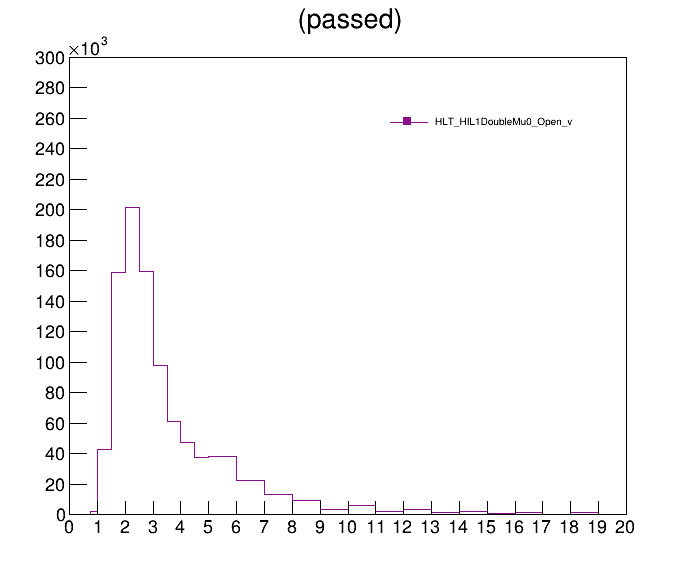

In [42]:
leg.SetX1(0.55);leg.SetX2(0.85);leg.SetY1(0.62);leg.SetY2(0.85);
leg.Clear()
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'hlteta', canv, _col = 221, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Open_v", _rxd = -2.4, _rxu = 2.4, _ryd= 0 , _ryu = 2e+5, _nx = 12, _ny = 20)
leg.DrawClone()
canv.Draw()
leg.Clear()
canv.SaveAs("HLTKineDist/HLT_eta_L1DoubleMuOpen_Data2018New_v9.pdf")
leg.SetX1(0.55);leg.SetX2(0.85);leg.SetY1(0.72);leg.SetY2(0.85);
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'hltphi', canv, _col = 221, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Open_v", _rxd = (-2)* 3.14, _rxu = 2 * 3.14, _ryd= 0 , _ryu = 4e+4, _nx = 12, _ny = 20)
leg.DrawClone()
canv.Draw()
leg.Clear()
canv.SaveAs("HLTKineDist/HLT_phi_L1DoubleMuOpen_Data2018New_v9.pdf")
leg.SetX1(0.55);leg.SetX2(0.85);leg.SetY1(0.72);leg.SetY2(0.85);
canv, leg = DrawTrigSeq(f_out.Get("HLT_HIL1DoubleMu0_Open_v"), 'hltpt', canv, _col = 221, _leg = leg, _disc = "HLT_HIL1DoubleMu0_Open_v", _rxd = 0, _rxu = 20, _ryd= 0 , _ryu = 3e+5, _nx = 20, _ny = 20)
leg.DrawClone()
canv.Draw()
leg.Clear()
canv.SaveAs("HLTKineDist/HLT_pt_L1DoubleMuOpen_Data2018New_v9.pdf")